## Predicting Survival in the Titanic Data Set
#### by Neha Narang on 13 Oct 2020

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing



from sklearn.metrics import classification_report

import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV  # depreciated sklearn.cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
# creating dataframe
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']
titanic.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin E mbarked  
0      0         A/5 21171   7.2500   NaN         S  
1      0          PC 17599  71.2833   C85         C  
2      0  STON/O2. 3101282   7.9250   NaN         S  
3      0            113803  53.1000  C123         S  
4      0            373450   8.0500   NaN         S

In [3]:
# As per the requirement , using only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
#(Parents/children aboard), and Fare to predict whether a passenger survived.

titanic.drop(columns= ['PassengerId','Name','Ticket','Cabin','E mbarked'],inplace=True)
titanic.head()


Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500

In [4]:
titanic.shape

(891, 7)

In [5]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [7]:
# filling age field with mean age 
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [9]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [10]:
titanic['Sex'].replace({'female':'0','male':'1'},inplace=True)

In [11]:
X = titanic.drop(columns = 'Survived')
y = titanic['Survived']

In [12]:
X.head()

Pclass Sex   Age  SibSp  Parch     Fare
0       3   1  22.0      1      0   7.2500
1       1   0  38.0      1      0  71.2833
2       3   0  26.0      0      0   7.9250
3       1   0  35.0      1      0  53.1000
4       3   1  35.0      0      0   8.0500

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 325)

In [14]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

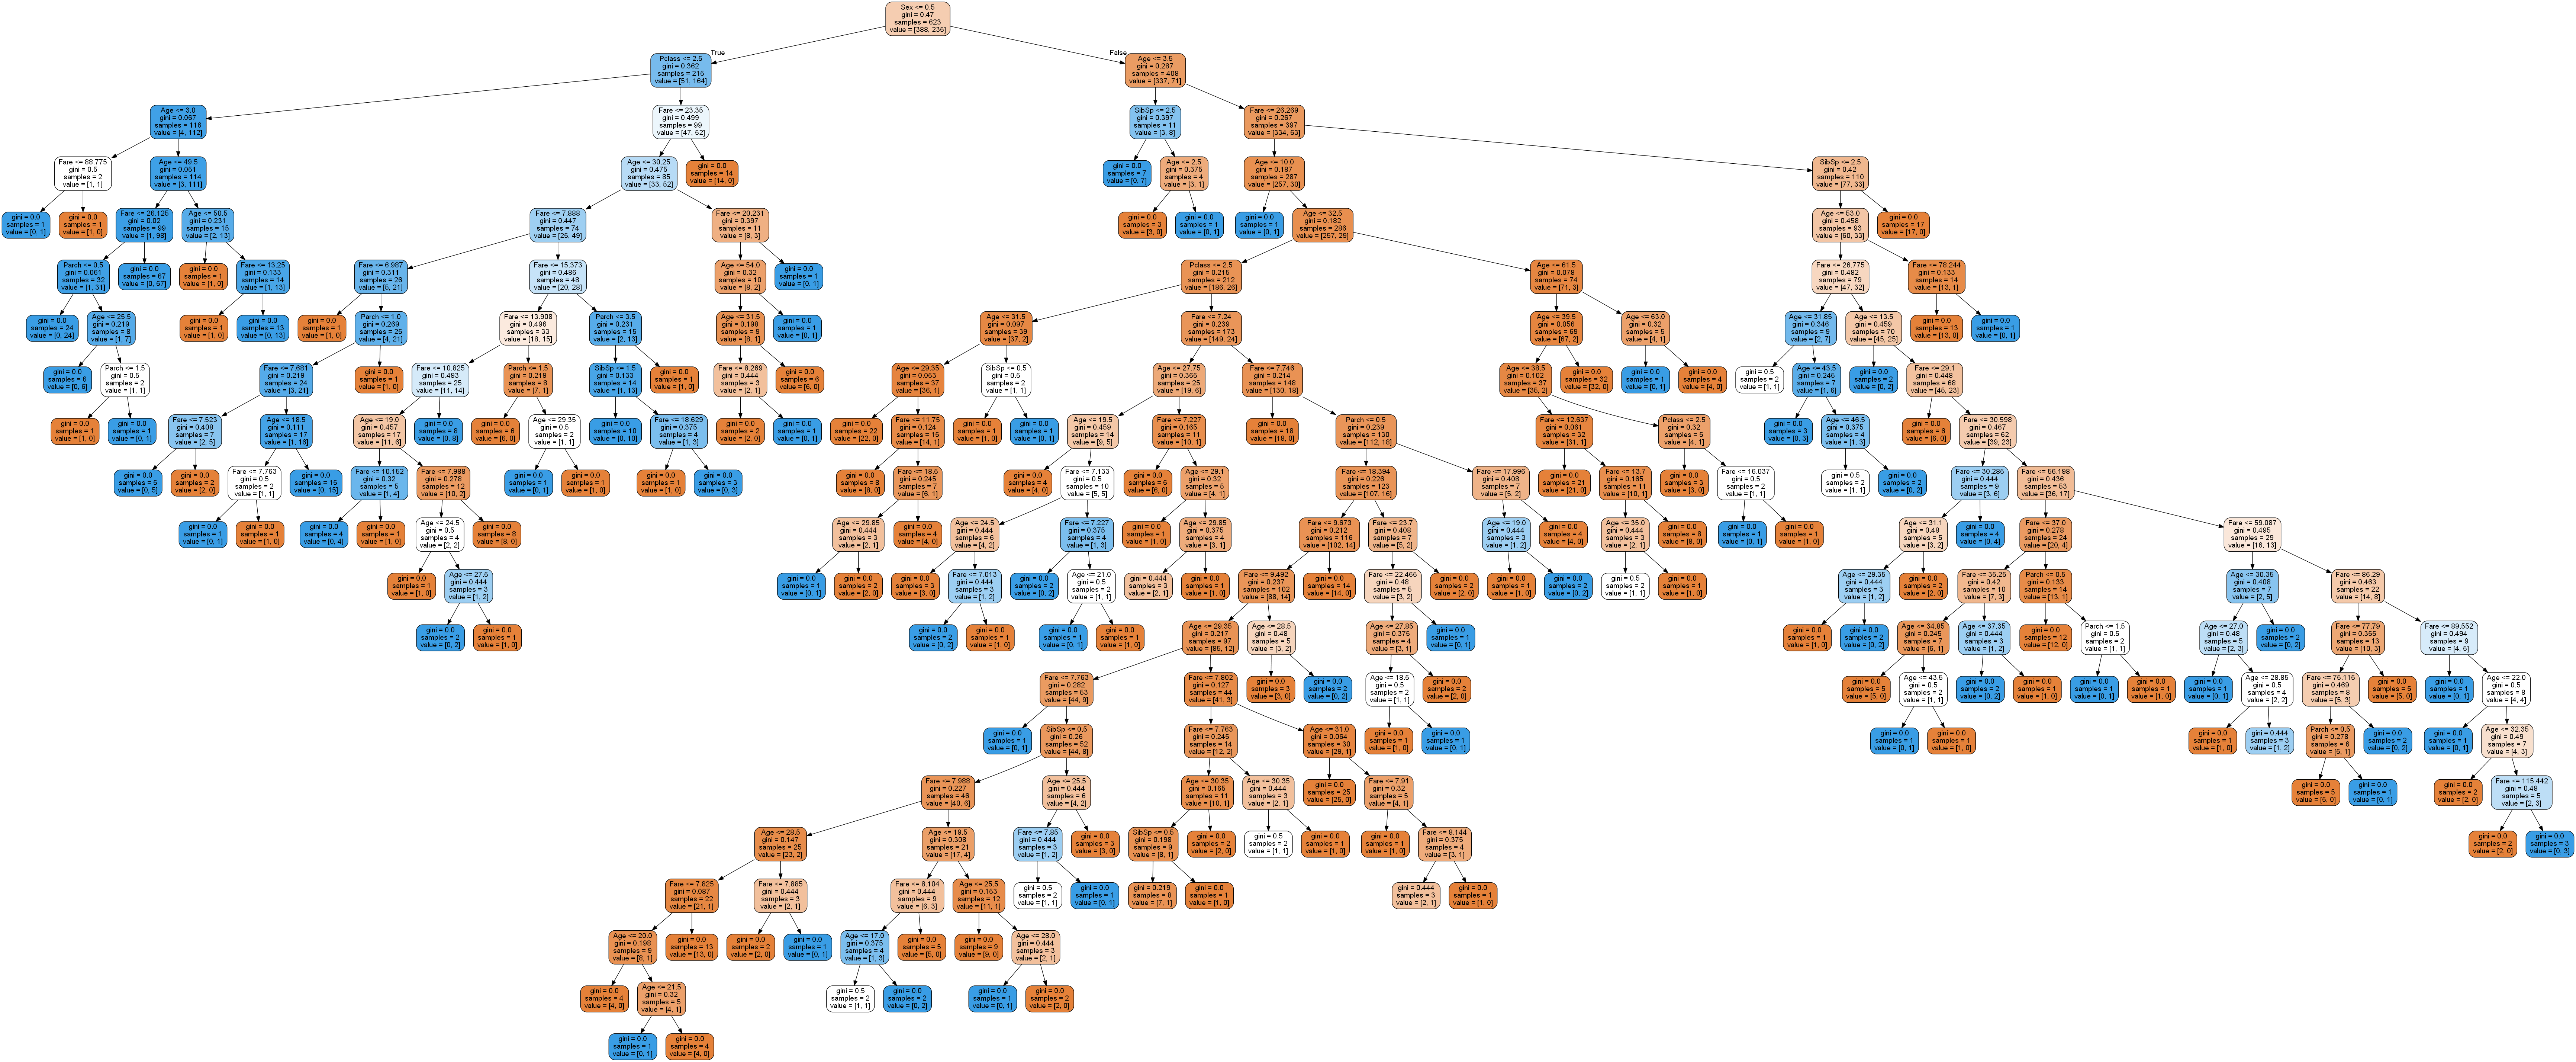

In [16]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [17]:
clf.score(x_train,y_train)

0.9839486356340289

In [18]:
py_pred = clf.predict(x_test)

In [19]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7425373134328358

In [20]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 325)

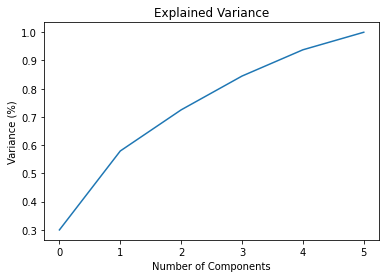

In [22]:
# testing with PCA to check if accuracy increases

from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [23]:
pca = PCA(n_components=5)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])

In [24]:
principal_x

PC-1      PC-2      PC-3      PC-4      PC-5
0   -0.926296 -0.895259  0.557193  0.347665 -0.373523
1    1.497933  1.339850 -0.728178 -0.011950 -1.017527
2   -0.449617 -0.505489 -1.599096 -0.078296 -0.319100
3    1.302467  1.103392 -0.826647  0.032045 -1.019646
4   -1.310593  0.038177  0.295140 -0.280385  0.122964
..        ...       ...       ...       ...       ...
886 -0.771675  0.391841  0.292556  0.472903  0.159551
887  0.737753  0.658127 -1.468480  0.976265 -0.305902
888  1.253125 -1.490482 -0.818409 -1.298678  0.759363
889 -0.118524  1.115808  0.405303  0.894113  0.153530
890 -1.304810 -0.091472  0.264036 -0.101330  0.148840

[891 rows x 5 columns]

In [25]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 325)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7350746268656716

In [26]:
# we are tuning five hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [27]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [28]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [29]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 8, 'min_samples_split': 9, 'splitter': 'random'}


In [30]:
grid_search.best_score_

0.8234451612903226

In [31]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, splitter='random')

In [32]:
clf.score(x_test,y_test)

0.7686567164179104

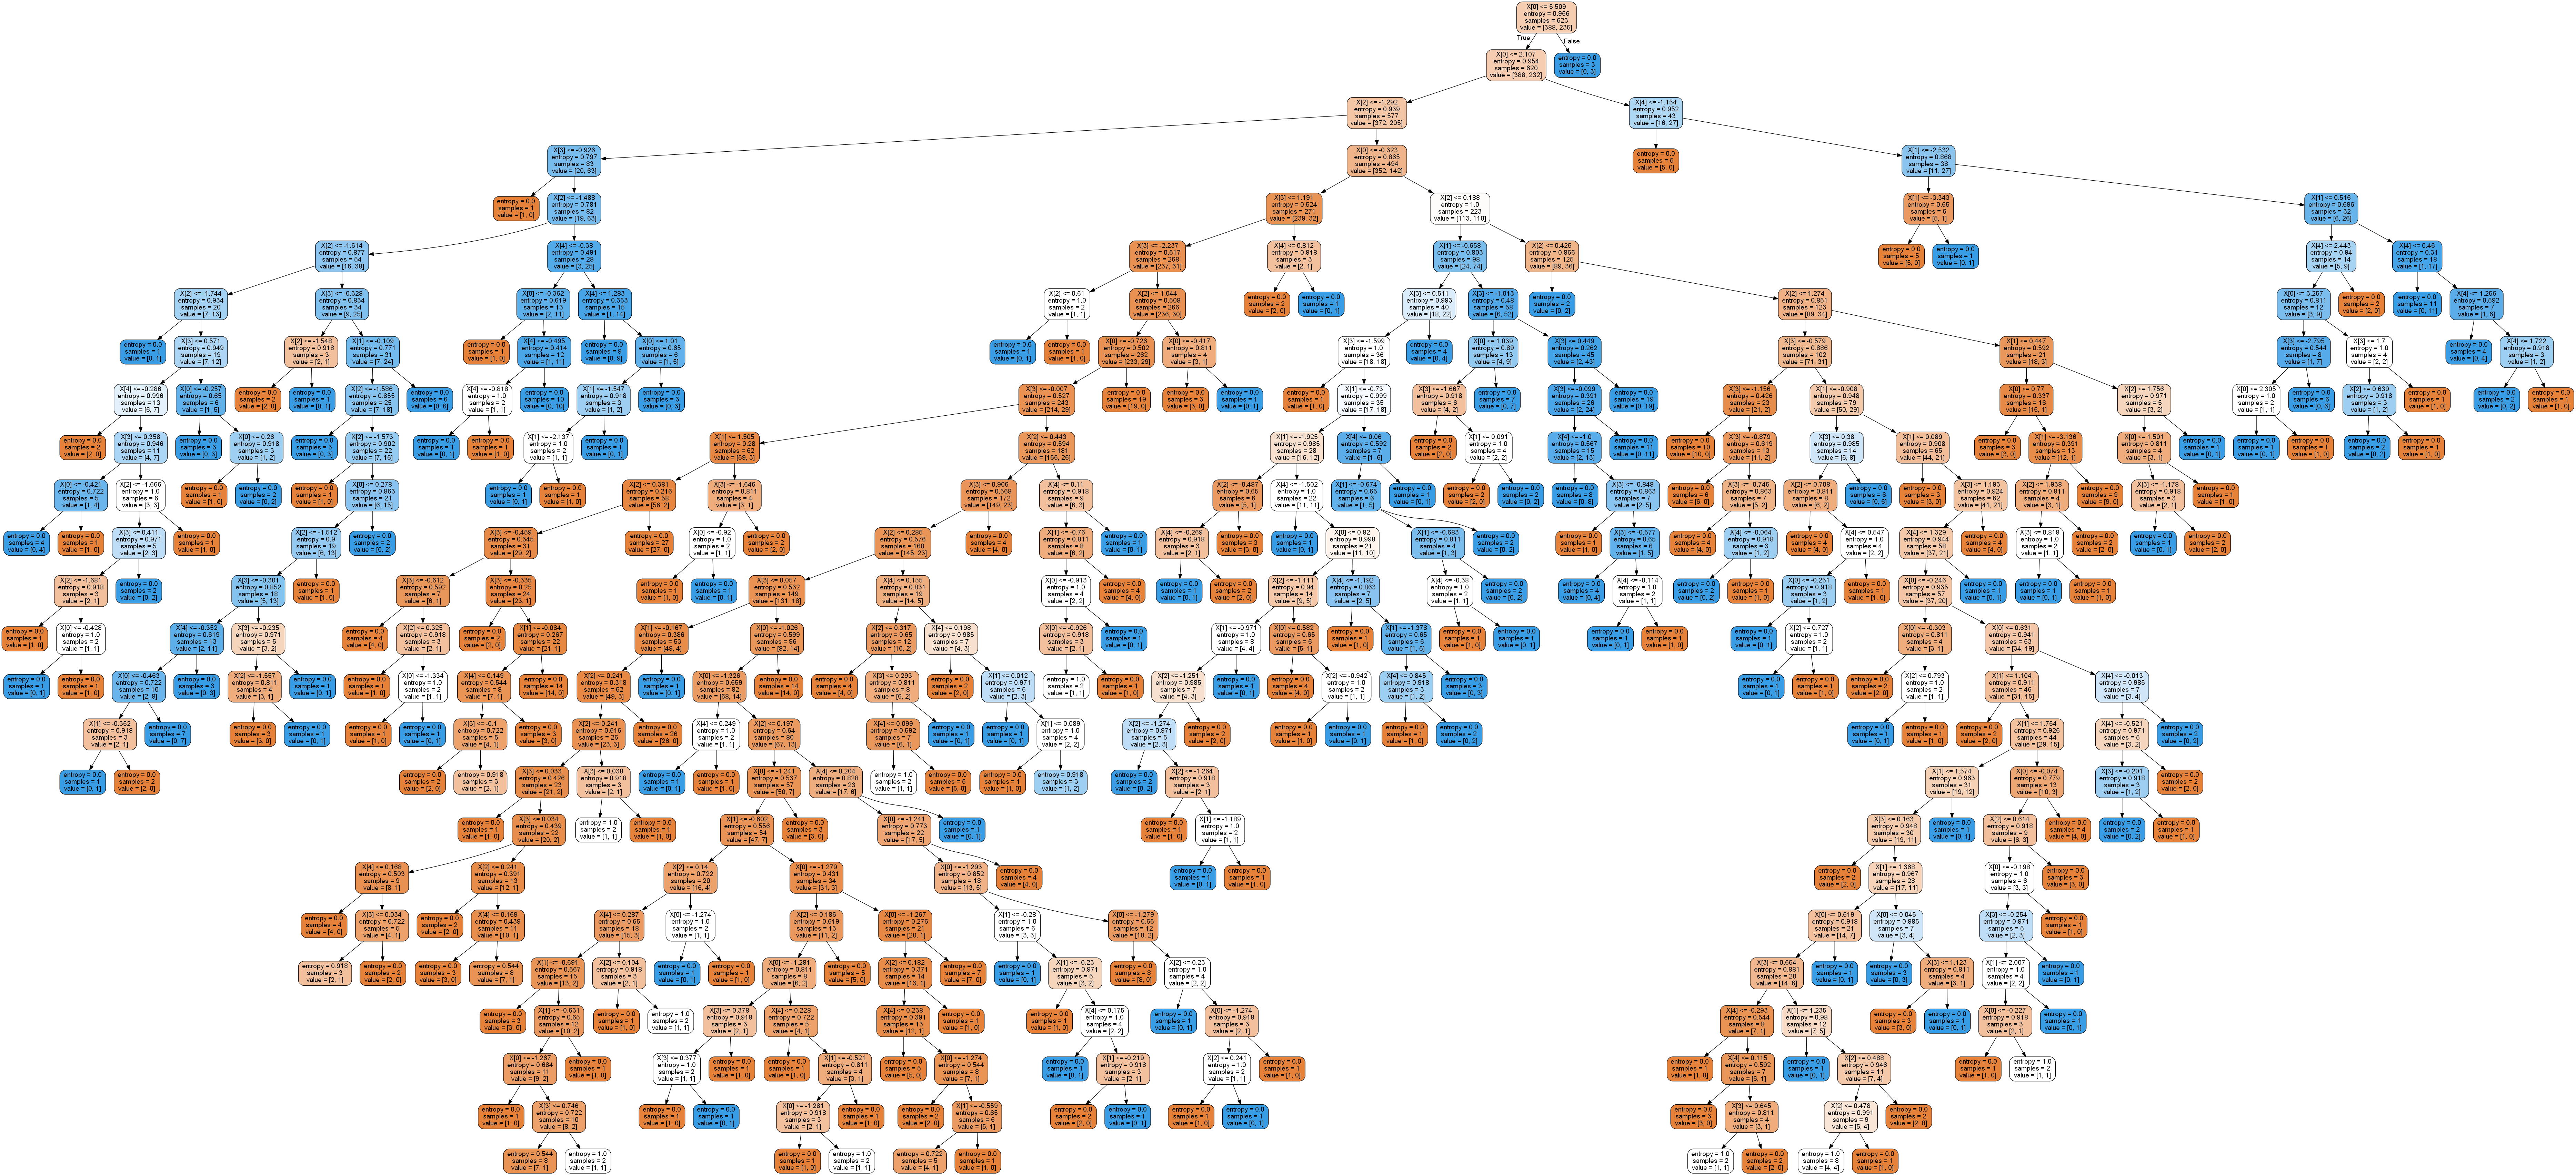

In [33]:
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

##### accuracy with gini index is 0.9839486356340289 and that for entropy is 0.7686567164179104. However gini indexing for test data is 0.7425373134328358, information gain is 0.7686567164179104.